In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.datasets import get_rdataset

In [3]:
data = get_rdataset('AirPassengers').data
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [10]:
seq_len = 12
mean,std = data.value.mean(),data.value.std()
vals_norm = (data.value - mean)/std
vals_norm = vals_norm.astype('float32')


In [11]:
X,y= [],[]
for i  in range(len(vals_norm)-seq_len):
  X.append(vals_norm.iloc[i:i+seq_len])
  y.append(vals_norm.iloc[i+seq_len])


In [12]:
X = np.array(X).reshape(-1,seq_len,1)
y = np.array(y).reshape(-1,1)

In [14]:
split  = int(0.8*len(X))
X_train,X_test = X[:split],X[split:]
y_train,y_test = y[:split],y[split:]

## LSTM

In [22]:
import tensorflow as tf
model1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,activation = 'tanh',input_shape = (seq_len,1)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model1.compile(optimizer='adam',loss = 'mse')

In [24]:
history1 = model1.fit(X_train,y_train,epochs = 100,batch_size = 16,validation_data=(X_test,y_test),verbose = 1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.5742 - val_loss: 1.7607
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4010 - val_loss: 1.2617
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2200 - val_loss: 0.8820
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1640 - val_loss: 0.7037
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1320 - val_loss: 0.5028
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1286 - val_loss: 0.3907
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1250 - val_loss: 0.3794
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1249 - val_loss: 0.3934
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1167 - val_loss: 0.4358
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1184 - val_loss: 0.4195
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1246 - val_loss: 0.3880
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1094 - val_lo

In [25]:
from sklearn.metrics import mean_squared_error
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


0.18760259449481964

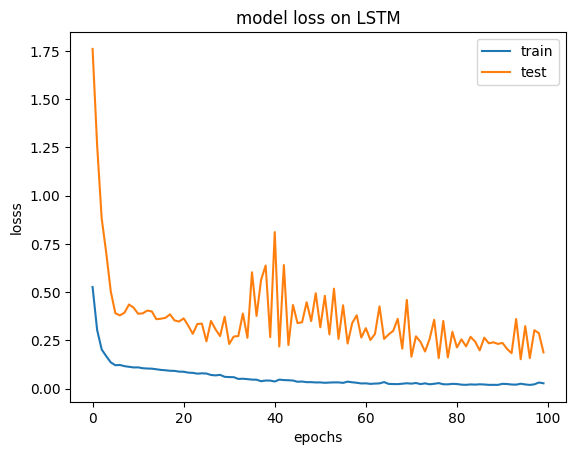

In [27]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label = "train")
plt.plot(history1.history['val_loss'],label = "test")
plt.xlabel("epochs")
plt.ylabel('losss')
plt.title("model loss on LSTM")
plt.legend()
plt.show()

## GRU

In [28]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.GRU(64,activation = 'tanh',input_shape = (seq_len,1)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model2.compile(optimizer='adam',loss = 'mse')

In [31]:
history2 = model2.fit(X_train,y_train,epochs = 100,batch_size = 16,validation_data=(X_test,y_test),verbose = 1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4294 - val_loss: 1.1041
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2503 - val_loss: 0.6058
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1652 - val_loss: 0.4072
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1178 - val_loss: 0.3759
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1218 - val_loss: 0.3589
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1102 - val_loss: 0.3415
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1011 - val_loss: 0.3276
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0976 - val_loss: 0.3111
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1057 - val_loss: 0.3005
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0974 - val_loss: 0.2944
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1040 - val_loss: 0.2806
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0979 - val_lo

In [35]:
y_pred1 = model2.predict(X_test)
mse1 = mean_squared_error(y_test,y_pred1)
mse1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


0.16423991322517395

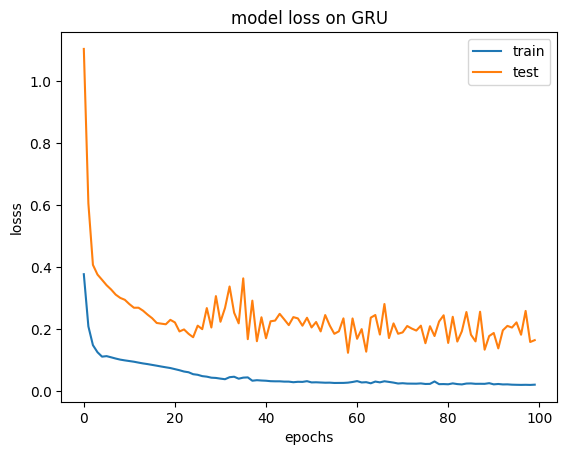

In [34]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'],label = "train")
plt.plot(history2.history['val_loss'],label = "test")
plt.xlabel("epochs")
plt.ylabel('losss')
plt.title("model loss on GRU")
plt.legend()
plt.show()